In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

In [2]:
df = pd.read_csv("Germany_largest_companies.csv")
df.head()

,Global Rank\t,Company\t,Sales ($billion)\t,Profits ($billion)\t,Assets ($billion)\t,Market Value ($billion)
0,14,Volkswagen Group,254.0,28.6,408.2,94.4
1,25,Allianz,140.3,6.8,915.8,66.4
2,36,Daimler,150.8,8.0,211.9,64.1
3,51,Siemens,100.6,5.7,134.4,91.9
4,55,BMW Group,98.8,6.6,165.5,60.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Global Rank	             50 non-null     int64  
 1   Company	                 50 non-null     object 
 2   Sales ($billion)	        50 non-null     float64
 3   Profits ($billion)	      50 non-null     float64
 4   Assets ($billion)	       50 non-null     float64
 5   Market Value ($billion)  50 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 2.5+ KB


In [15]:
df.columns = ["global_rank","company","sales_bi","profits_bi","assets_bi","market_value_bi"]
df.sort_values(by='assets_bi', ascending=False).head(10)

,global_rank,company,sales_bi,profits_bi,assets_bi,market_value_bi
14,301,Deutsche Bank,55.0,0.4,2652.6,41.3
1,25,Allianz,140.3,6.8,915.8,66.4
25,654,Commerzbank,25.5,0.0,838.3,9.2
0,14,Volkswagen Group,254.0,28.6,408.2,94.4
6,81,Munich Re,88.0,4.2,340.6,34.9
27,684,Deutsche Boerse,2.8,0.8,285.5,12.5
2,36,Daimler,150.8,8.0,211.9,64.1
7,99,E.ON,174.2,2.9,184.9,32.5
18,413,Talanx,34.9,0.8,171.7,7.9
4,55,BMW Group,98.8,6.6,165.5,60.0


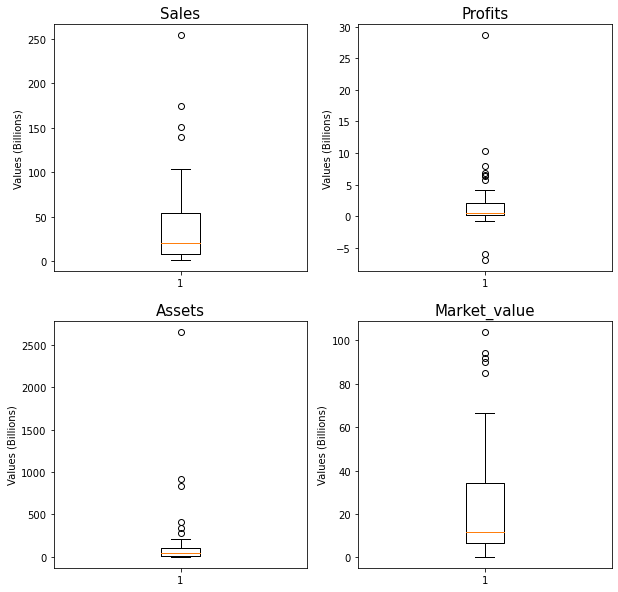

In [10]:
fig, axes = plt.subplots(2,2,figsize =(10, 10))
columns = df.select_dtypes("float64").columns.tolist()
idx=0
for row in range(2):
    for column in range(2):
        axes[row][column].boxplot(df[columns[idx]]) 
        axes[row][column].set_title(columns[idx].replace("_bi","").capitalize(), fontsize=15)
        #axes[row][column].set_ylim(0 if df[columns[idx]].min() > 10**100000000 else df[columns[idx]].min(),df[columns[idx]].max())
        #axes[row][column].set_yticks(np.linspace(df[columns[idx]].min(), df[columns[idx]].max(), 6))
        axes[row][column].set_ylabel("Values (Billions)")
        idx=idx+1



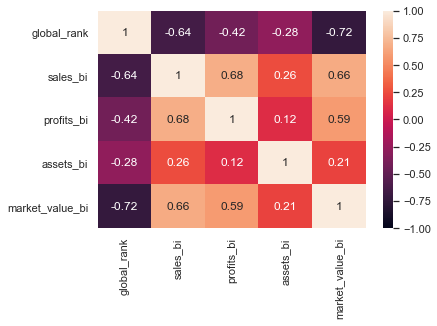

In [12]:
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

<ipython-input-29-806c46bce889>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  labels = axes[row][column].set_xticklabels(df1["company"])
<ipython-input-29-806c46bce889>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  labels = axes[row][column].set_xticklabels(df1["company"])
<ipython-input-29-806c46bce889>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  labels = axes[row][column].set_xticklabels(df1["company"])
<ipython-input-29-806c46bce889>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  labels = axes[row][column].set_xticklabels(df1["company"])


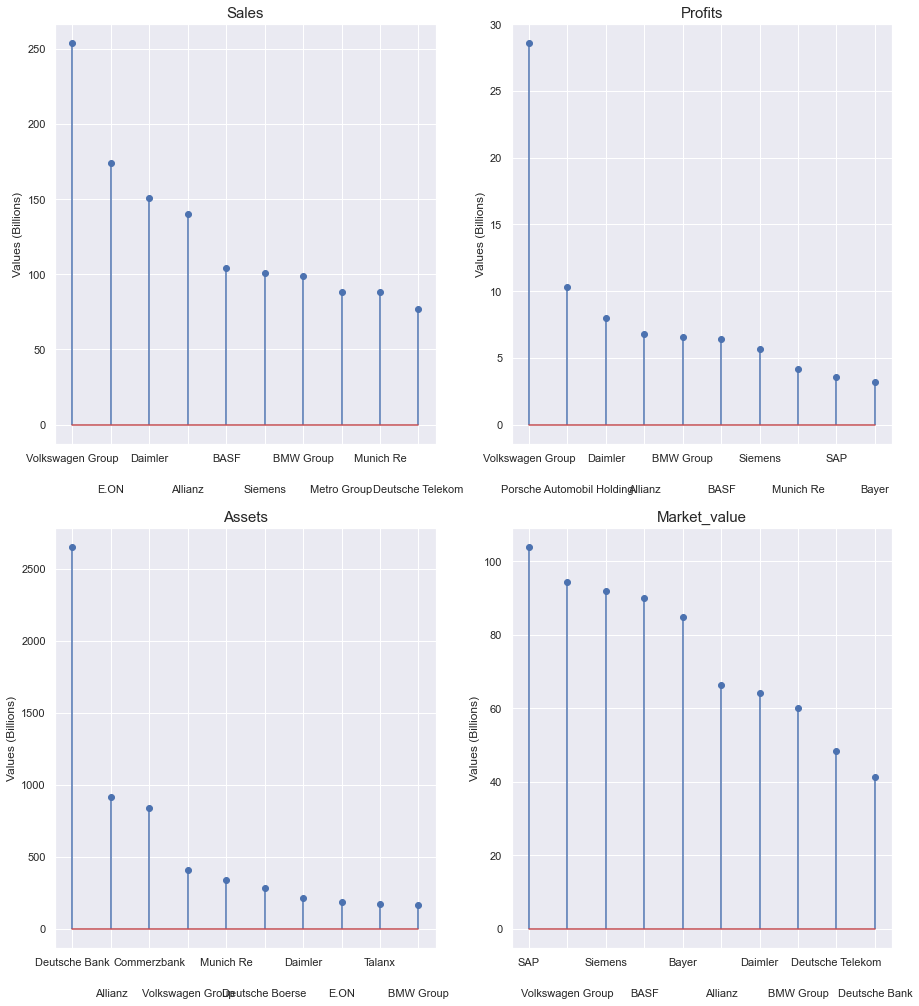

In [29]:

fig, axes = plt.subplots(2,2,figsize =(15, 17))
columns = df.select_dtypes("float64").columns.tolist()
idx=0
for row in range(2):
    for column in range(2):
        df1 = df.sort_values(by=columns[idx], ascending=False).head(10)
        axes[row][column].stem(df1["company"], df1[columns[idx]]) 
        axes[row][column].set_title(columns[idx].replace("_bi","").capitalize(), fontsize=15)
        #axes[row][column].set_ylim(0 if df[columns[idx]].min() > 10**100000000 else df[columns[idx]].min(),df[columns[idx]].max())
        #axes[row][column].set_yticks(np.linspace(df[columns[idx]].min(), df[columns[idx]].max(), 6))
        axes[row][column].set_ylabel("Values (Billions)")
        labels = axes[row][column].set_xticklabels(df1["company"])
        for i, label in enumerate(labels):
            label.set_y(label.get_position()[1] - (i % 2) * 0.075)
        idx=idx+1
